<a href="https://colab.research.google.com/github/Soniartha/My_Strategy_Trading_Soniartha/blob/main/Simulasi_Chapter_6_GBPUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER 5  DATA VISUALIZATION
Great Pound Sterling VS U.S. Dollar

##5.1 Read Data GBPUSD

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
"""
    Parse date: We give the function a hint that data in the first column 
    contains dates that need to be parsed.
    Kesimpulan sementara yaitu parsed_date hanya bisa dilakukan untuk data yang memiliki tipe Daily
    
"""
series = read_csv('/content/GBPUSD_Daily_202001020000_202012310000.csv', header = 0, index_col= 0, squeeze= True, parse_dates=True)
series


,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
<DATE>,,,,,,,
2020-01-02,1.32090,1.32305,1.31150,1.31363,48916,0,2
2020-01-03,1.31363,1.31599,1.30532,1.30743,59795,0,2
2020-01-06,1.30781,1.31741,1.30625,1.31682,50184,0,2
2020-01-07,1.31684,1.32119,1.30948,1.31203,55737,0,0
2020-01-08,1.31180,1.31694,1.30801,1.30938,65260,0,0
...,...,...,...,...,...,...,...
2020-12-24,1.34908,1.36193,1.34876,1.35336,69180,0,0
2020-12-28,1.35441,1.35762,1.34293,1.34511,74871,0,0
2020-12-29,1.34507,1.35225,1.34392,1.35003,87063,0,0


In [3]:
df = series.filter(['<CLOSE>'])
df

,<CLOSE>
<DATE>,
2020-01-02,1.31363
2020-01-03,1.30743
2020-01-06,1.31682
2020-01-07,1.31203
2020-01-08,1.30938
...,...
2020-12-24,1.35336
2020-12-28,1.34511
2020-12-29,1.35003


##5.2 Line Plot

####5.2.1 Line Type

In [4]:
from matplotlib import pyplot

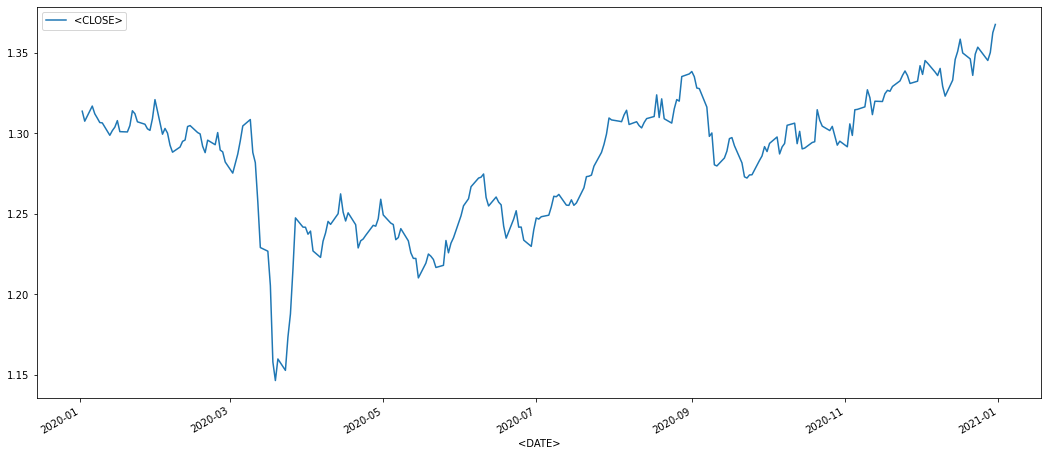

In [5]:
df.plot(figsize=(18,8))
pyplot.show()

####5.2.2 Dot Type

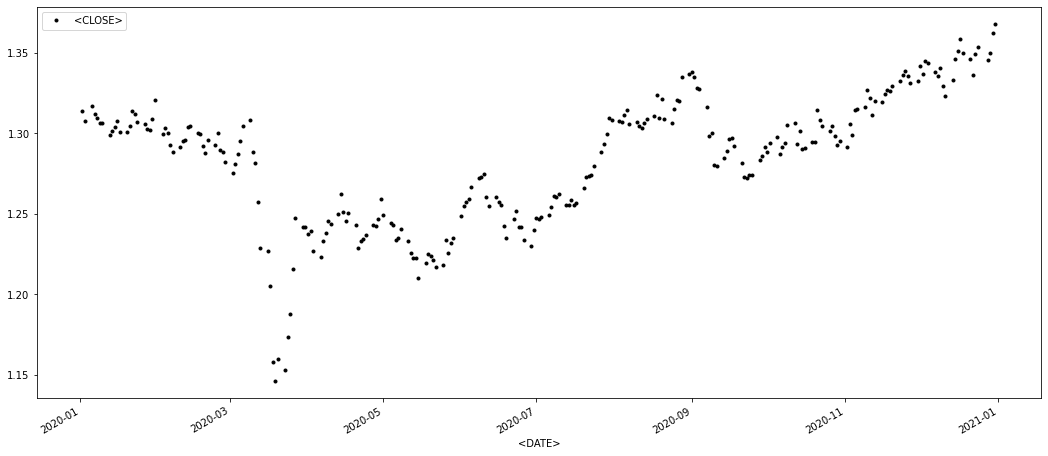

In [6]:
df.plot(style='k.', figsize = (18,8))
pyplot.show()

####5.2.3 Group by month

In [7]:
print(df.head(10))

            <CLOSE>
<DATE>             
2020-01-02  1.31363
2020-01-03  1.30743
2020-01-06  1.31682
2020-01-07  1.31203
2020-01-08  1.30938
2020-01-09  1.30659
2020-01-10  1.30637
2020-01-13  1.29867
2020-01-14  1.30157
2020-01-15  1.30373


In [8]:
#Import library, using Grouper() function from pandas for grouping the data by specific time
from pandas import Grouper 
from pandas import DataFrame

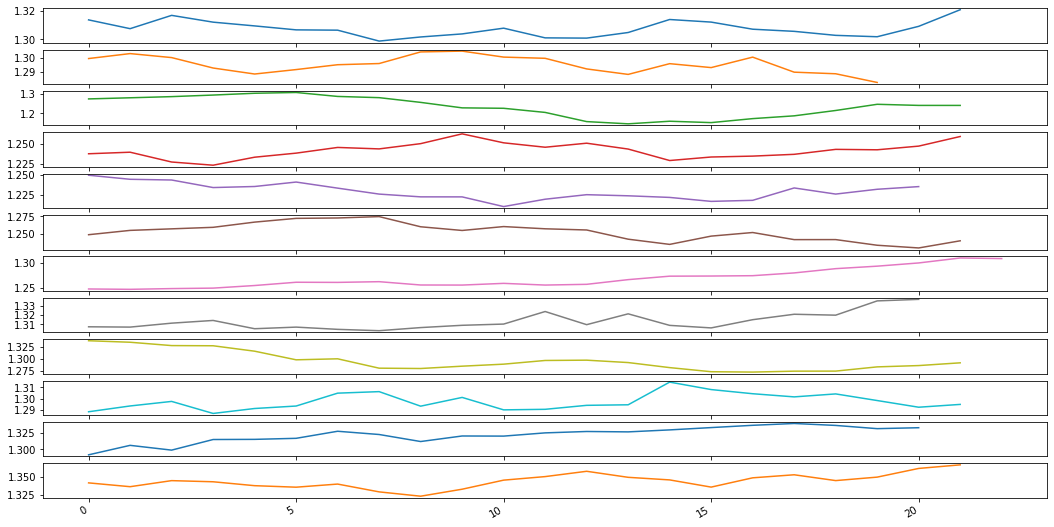

In [31]:
groups = df.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis = 1)
months = DataFrame(months)
months.columns = range(1,13)
months.plot(subplots=True, legend = False, figsize = (18,10))
pyplot.show()

##5.3 Histogram and Density

In [ ]:
df

#### Histogram

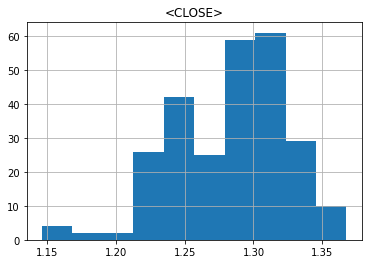

In [16]:
df.hist()
pyplot.show()

####Density Plot

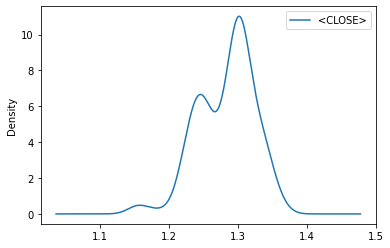

In [14]:
df.plot(kind='kde')
pyplot.show()

##5.4 Box and Whisker Plots by Interval

In [19]:
from pandas import concat

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


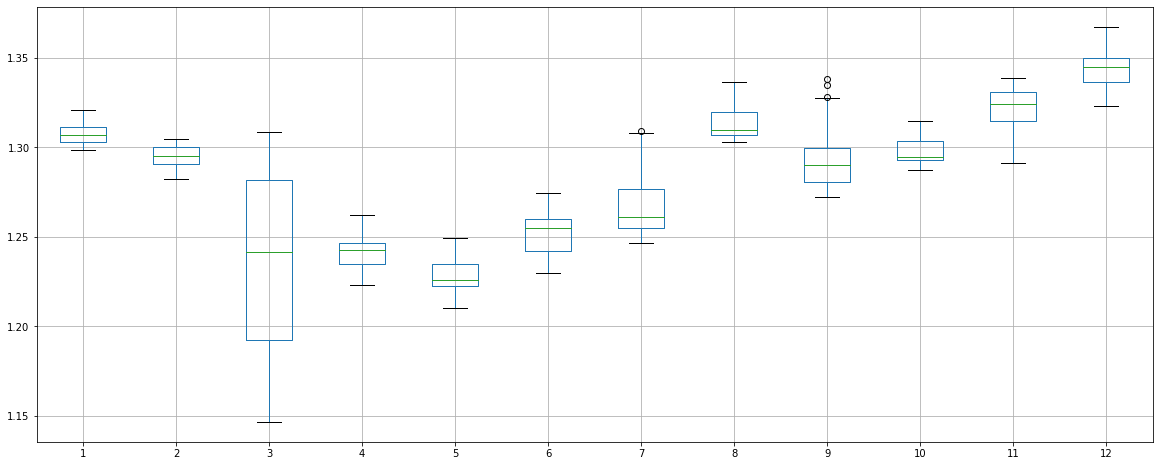

In [22]:
groups1 = df.groupby(Grouper(freq='M'))
months1 = concat([DataFrame(x[1].values) for x in groups1], axis = 1)
months1 = DataFrame(months1)
months1.columns = range(1,13)
months1.boxplot(figsize=(20,8))
pyplot.show()

##5.5 Heat Maps

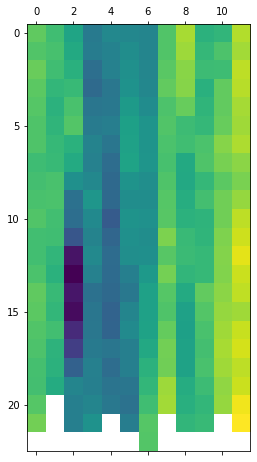

In [29]:
groups2 = df.groupby(Grouper(freq='M'))
months2 = concat([DataFrame(x[1].values) for x in groups2], axis = 1)
months2 = DataFrame(months2)
months2.columns = range(1,13)
pyplot.matshow(months2, interpolation = None, aspect = 'auto')
pyplot.show()

##5.6 Lag Scatter Plots

In [32]:
from pandas.plotting import lag_plot

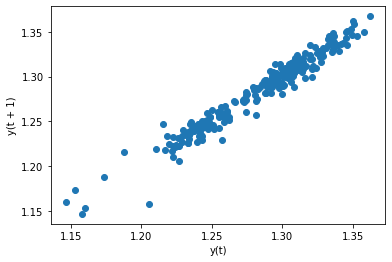

In [33]:
lag_plot(df)
pyplot.show()

#### Multi Lag_plot

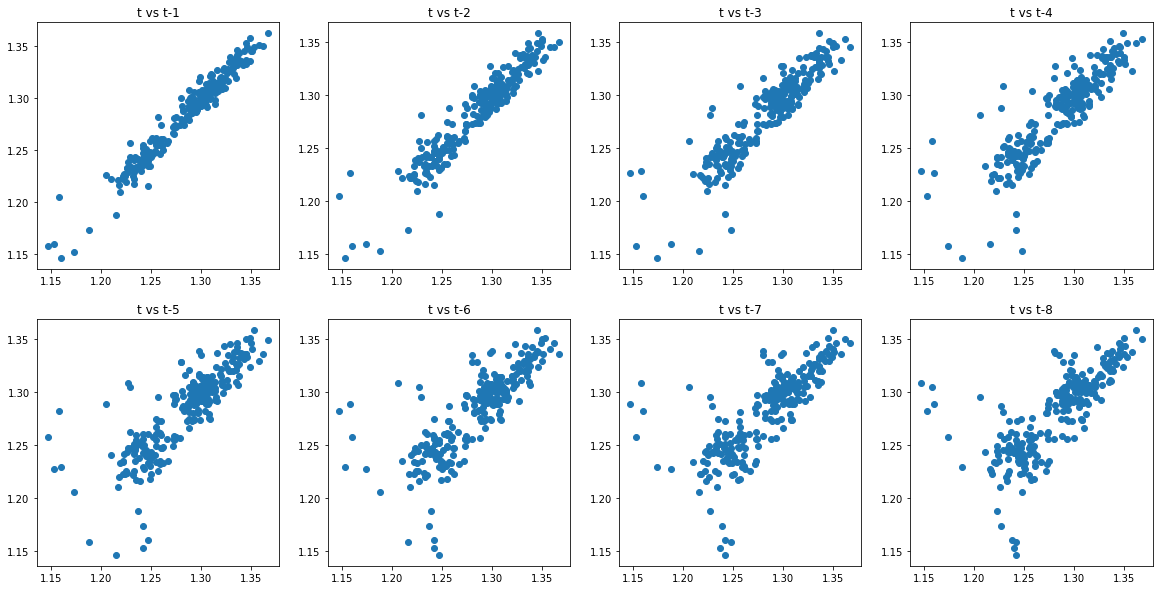

In [43]:
values  = DataFrame(df.values)
lag = 8
columns = [values]
for i in range (1, (lag + 1)):
  columns.append(values.shift(i))
dataframe = concat(columns, axis = 1)
columns = ['t']
for i in range (1,(lag + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1, figsize=(20,10))
for i in range(1, (lag + 1)):
  ax = pyplot.subplot(240+i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x = dataframe['t'].values, y = dataframe['t-' + str(i)].values)
pyplot.show()

#5.6 Autocorrelation

In [39]:
from pandas.plotting import autocorrelation_plot

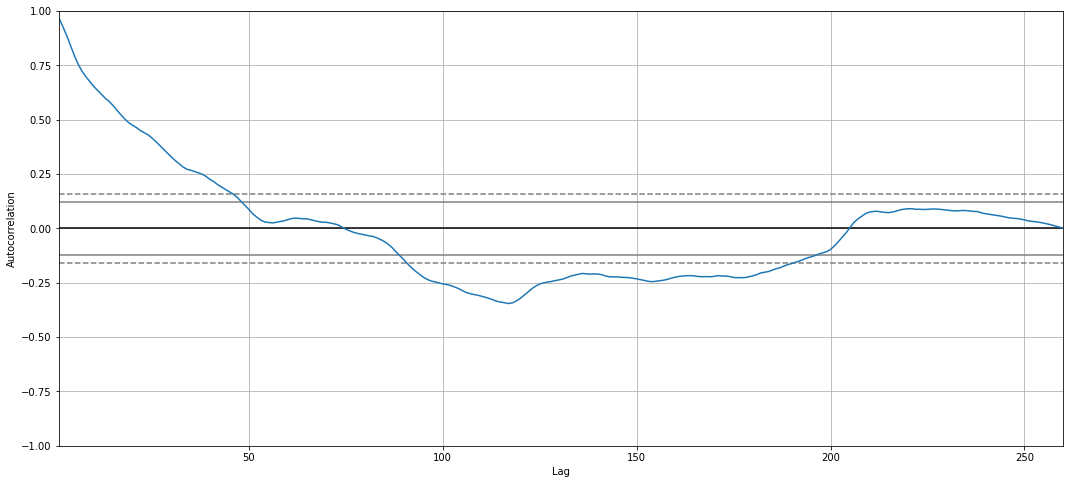

In [41]:
pyplot.figure(figsize=(18,8))
autocorrelation_plot(df)
pyplot.show()

In [ ]:
"""
    lag along the x-axis and correlation on the y-axis.
    Dotted line are provided, that indicate any correlation values above those lines are statistically significant (meaningful)
     